In [7]:
from PIL import Image
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.models as models
vgg16_pretrained = models.vgg16(pretrained=False)

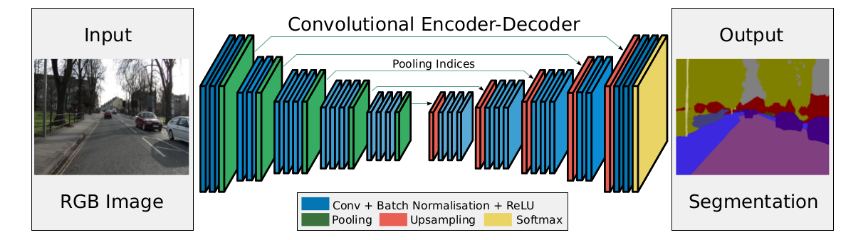

In [8]:
Image.open('/home/lsj/Music/1.png')

In [9]:
def decoder(input_channel, output_channel, num=3):
    if num == 3:
        decoder_body = nn.Sequential(
            nn.Conv2d(input_channel, input_channel, 3, padding=1),
            nn.Conv2d(input_channel, input_channel, 3, padding=1),
            nn.Conv2d(input_channel, output_channel, 3, padding=1))
    elif num == 2:
        decoder_body = nn.Sequential(
            nn.Conv2d(input_channel, input_channel, 3, padding=1),
            nn.Conv2d(input_channel, output_channel, 3, padding=1))

    return decoder_body

In [18]:
class VGG16_SegNet(torch.nn.Module):
    def __init__(self):
        super(VGG16_deconv, self).__init__()

        pool_list = [4, 9, 16, 23, 30]
        for index in pool_list:
            vgg16_pretrained.features[index].return_indices = True

        self.encoder1 = vgg16_pretrained.features[:4]
        self.pool1 = vgg16_pretrained.features[4]

        self.encoder2 = vgg16_pretrained.features[5:9]
        self.pool2 = vgg16_pretrained.features[9]

        self.encoder3 = vgg16_pretrained.features[10:16]
        self.pool3 = vgg16_pretrained.features[16]

        self.encoder4 = vgg16_pretrained.features[17:23]
        self.pool4 = vgg16_pretrained.features[23]

        self.encoder5 = vgg16_pretrained.features[24:30]
        self.pool5 = vgg16_pretrained.features[30]

        self.decoder5 = decoder(512, 512)
        self.unpool5 = nn.MaxUnpool2d(2, 2)

        self.decoder4 = decoder(512, 256)
        self.unpool4 = nn.MaxUnpool2d(2, 2)

        self.decoder3 = decoder(256, 128)
        self.unpool3 = nn.MaxUnpool2d(2, 2)

        self.decoder2 = decoder(128, 64, 2)
        self.unpool2 = nn.MaxUnpool2d(2, 2)

        self.decoder1 = decoder(64, 12, 2)
        self.unpool1 = nn.MaxUnpool2d(2, 2)

    def forward(self, x):  
        print('input_image:', x.size())
        encoder1 = self.encoder1(x);print('encoder1:', encoder1.size())
        output_size1 = encoder1.size();print('output_size1:', output_size1)
        pool1, indices1 = self.pool1(encoder1);print('pool1:', pool1.size());print('indices1:', indices1.size())

        encoder2 = self.encoder2(pool1);print('encoder2:', encoder2.size())
        output_size2 = encoder2.size();print('output_size2:', output_size2)
        pool2, indices2 = self.pool2(encoder2);print('pool2:', pool2.size());print('indices2:', indices2.size())

        encoder3 = self.encoder3(pool2);print('encoder3:', encoder3.size())
        output_size3 = encoder3.size();print('output_size3:', output_size3)
        pool3, indices3 = self.pool3(encoder3);print('pool3:', pool3.size());print('indices3:', indices3.size())

        encoder4 = self.encoder4(pool3);print('encoder4:', encoder4.size())
        output_size4 = encoder4.size();print('output_size4:', output_size4)
        pool4, indices4 = self.pool4(encoder4);print('pool4:', pool4.size());print('indices4:', indices4.size())

        encoder5 = self.encoder5(pool4);print('encoder5:', encoder5.size())
        output_size5 = encoder5.size();print('output_size5:', output_size5)
        pool5, indices5 = self.pool5(encoder5);print('pool5:', pool5.size());print('indices5:', indices5.size())

        unpool5 = self.unpool5(input=pool5, indices=indices5, output_size=output_size5);print('unpool5:', unpool5.size())
        decoder5 = self.decoder5(unpool5);print('decoder5:', decoder5.size())

        unpool4 = self.unpool4(input=decoder5, indices=indices4, output_size=output_size4);print('unpool4:', unpool4.size())
        decoder4 = self.decoder4(unpool4);print('decoder4:', decoder4.size())

        unpool3 = self.unpool3(input=decoder4, indices=indices3, output_size=output_size3);print('unpool3:', unpool3.size())
        decoder3 = self.decoder3(unpool3);print('decoder3:', decoder3.size())

        unpool2 = self.unpool2(input=decoder3, indices=indices2, output_size=output_size2);print('unpool2:', unpool2.size())
        decoder2 = self.decoder2(unpool2);print('decoder2:', decoder2.size())

        unpool1 = self.unpool1(input=decoder2, indices=indices1, output_size=output_size1);print('unpool1:', unpool1.size())
        decoder1 = self.decoder1(unpool1);print('decoder1:', decoder1.size())

        return decoder1

In [19]:
image = torch.rand((1, 3, 352, 480))
image.size()

torch.Size([1, 3, 352, 480])

In [20]:
SegNet = VGG16_SegNet()

In [21]:
mask = VGG16_SegNet(image)

input_image: torch.Size([1, 3, 352, 480])
encoder1: torch.Size([1, 64, 352, 480])
output_size1: torch.Size([1, 64, 352, 480])
pool1: torch.Size([1, 64, 176, 240])
indices1: torch.Size([1, 64, 176, 240])
encoder2: torch.Size([1, 128, 176, 240])
output_size2: torch.Size([1, 128, 176, 240])
pool2: torch.Size([1, 128, 88, 120])
indices2: torch.Size([1, 128, 88, 120])
encoder3: torch.Size([1, 256, 88, 120])
output_size3: torch.Size([1, 256, 88, 120])
pool3: torch.Size([1, 256, 44, 60])
indices3: torch.Size([1, 256, 44, 60])
encoder4: torch.Size([1, 512, 44, 60])
output_size4: torch.Size([1, 512, 44, 60])
pool4: torch.Size([1, 512, 22, 30])
indices4: torch.Size([1, 512, 22, 30])
encoder5: torch.Size([1, 512, 22, 30])
output_size5: torch.Size([1, 512, 22, 30])
pool5: torch.Size([1, 512, 11, 15])
indices5: torch.Size([1, 512, 11, 15])
unpool5: torch.Size([1, 512, 22, 30])
decoder5: torch.Size([1, 512, 22, 30])
unpool4: torch.Size([1, 512, 44, 60])
decoder4: torch.Size([1, 256, 44, 60])
unpool3